In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [6]:
# Base url for api
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create lists to store response data
weather_data = []
temp = []
humidity = []
cloud = []
wind = []
country = []
date = []
city_name = []

# Output record Counter and Total count
record= 1
total_record = len(cities)

# Units to convert Kelvin to Farenheight 
units = 'imperial'

# Print Intial Data Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Create a loop to go through all the cities & perform the requests for data on each entry
for city in cities:

    query_url = f"{url}appid={weather_api_key}&units={units}&q="

    response = requests.get(query_url + city).json()
#     print(response)
    try:
        city_name.append(response['name'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"Processing Record {record} of {total_record}  | {city}" )
        
#       Add to increase record count by one for each city 
        record += 1
    except:
         print("City not found. Skipping...") 
        
# Print Ending Data Log Statement 
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of 629  | geraldton
Processing Record 2 of 629  | tiksi
Processing Record 3 of 629  | hilo
Processing Record 4 of 629  | vaini
Processing Record 5 of 629  | hermanus
Processing Record 6 of 629  | nantucket
Processing Record 7 of 629  | astana
Processing Record 8 of 629  | mpulungu
Processing Record 9 of 629  | mnogovershinnyy
Processing Record 10 of 629  | iqaluit
Processing Record 11 of 629  | hobart
Processing Record 12 of 629  | punta arenas
Processing Record 13 of 629  | barrow
Processing Record 14 of 629  | rikitea
Processing Record 15 of 629  | pevek
Processing Record 16 of 629  | kokopo
Processing Record 17 of 629  | tuktoyaktuk
Processing Record 18 of 629  | new norfolk
Processing Record 19 of 629  | kendari
Processing Record 20 of 629  | birjand
Processing Record 21 of 629  | haines junction
Processing Record 22 of 629  | henties bay
Processing Record 23 of 629  | vila franca do campo
City not found. 

Processing Record 189 of 629  | stupino
Processing Record 190 of 629  | tezu
Processing Record 191 of 629  | faanui
Processing Record 192 of 629  | hasaki
Processing Record 193 of 629  | isagarh
Processing Record 194 of 629  | banepa
Processing Record 195 of 629  | touros
Processing Record 196 of 629  | kapaa
Processing Record 197 of 629  | pedernales
Processing Record 198 of 629  | severo-kurilsk
Processing Record 199 of 629  | ponta do sol
Processing Record 200 of 629  | richards bay
Processing Record 201 of 629  | samarai
Processing Record 202 of 629  | bereda
Processing Record 203 of 629  | cabildo
Processing Record 204 of 629  | mishan
Processing Record 205 of 629  | da nang
Processing Record 206 of 629  | pangnirtung
City not found. Skipping...
Processing Record 207 of 629  | port macquarie
Processing Record 208 of 629  | waipawa
Processing Record 209 of 629  | namibe
Processing Record 210 of 629  | kahului
Processing Record 211 of 629  | male
Processing Record 212 of 629  | tuat

Processing Record 379 of 629  | kisangani
Processing Record 380 of 629  | moose factory
Processing Record 381 of 629  | bubaque
Processing Record 382 of 629  | rio verde de mato grosso
Processing Record 383 of 629  | williams lake
Processing Record 384 of 629  | mackay
Processing Record 385 of 629  | palpa
Processing Record 386 of 629  | itoman
Processing Record 387 of 629  | brae
Processing Record 388 of 629  | vanimo
Processing Record 389 of 629  | broome
Processing Record 390 of 629  | kruisfontein
Processing Record 391 of 629  | pirovskoye
Processing Record 392 of 629  | comodoro rivadavia
City not found. Skipping...
Processing Record 393 of 629  | lorengau
City not found. Skipping...
Processing Record 394 of 629  | yar-sale
Processing Record 395 of 629  | acapulco
Processing Record 396 of 629  | takoradi
Processing Record 397 of 629  | snezhnogorsk
Processing Record 398 of 629  | atambua
Processing Record 399 of 629  | porto novo
City not found. Skipping...
Processing Record 400 o

Processing Record 563 of 629  | boa vista
Processing Record 564 of 629  | gashua
City not found. Skipping...
Processing Record 565 of 629  | constantine
City not found. Skipping...
Processing Record 566 of 629  | corn island
Processing Record 567 of 629  | luganville
Processing Record 568 of 629  | ramhormoz
Processing Record 569 of 629  | sholokhove
Processing Record 570 of 629  | belaya gora
City not found. Skipping...
Processing Record 571 of 629  | beira
Processing Record 572 of 629  | karoi
Processing Record 573 of 629  | silver city
Processing Record 574 of 629  | coari
Processing Record 575 of 629  | suffolk
Processing Record 576 of 629  | grajau
-------------------------------
Data Retrieval Complete
-------------------------------


In [7]:
# Create a DataFrame containing 'City ', 'Country', 'Latitude', 'Longitude',  'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'
weather_data = pd.DataFrame(( city_name, country, lats, lngs, temp, humidity, cloud, wind, date), 
                            index=('City ', 'Country', 'Latitude', 'Longitude',  'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'), dtype="int").T
# Display DataFrame 


In [8]:
weather_data.dtypes

City           object
Country        object
Latitude       object
Longitude      object
Temperature    object
Humidity       object
Cloudiness     object
Wind Speed     object
Date           object
dtype: object

In [9]:
# Drop any rows containing missing values
weather_clean = weather_data.dropna(how='any')
weather_clean

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Geraldton,AU,-31.776,101.735,73.4,64,1,18.34,1604574441
1,Tiksi,RU,70.2128,125.964,7.14,95,99,6.13,1604574441
2,Hilo,US,8.76842,-160.167,73.4,78,1,4.7,1604574442
3,Vaini,TO,-42.7809,-169.923,73.4,88,40,4.7,1604574442
4,Hermanus,ZA,-55.5436,6.97447,72,74,86,5.01,1604574207
...,...,...,...,...,...,...,...,...,...
571,Karoi,ZW,-23.7513,119.966,90.52,27,4,9.1,1604574554
572,Silver City,US,73.9904,172.443,53.6,44,75,4.7,1604574554
573,Coari,BR,-4.11866,65.8038,76.08,95,100,3.15,1604574554
574,Suffolk,US,-16.8435,149.388,54,93,90,11.59,1604574554


In [10]:
# Find any cities with humidty of greater than 100, if none skip this step
weather_cities = weather_clean.loc[(weather_clean['Humidity'] >100)]


In [27]:
weather_clean['Latitude'] = pd.to_numeric(weather_clean['Latitude'], downcast="integer")
weather_clean['Temperature'] = pd.to_numeric(weather_clean['Temperature'], downcast="integer")
weather_clean['Humidity'] = pd.to_numeric(weather_clean['Humidity'], downcast="integer")
weather_clean['Cloudiness'] = pd.to_numeric(weather_clean['Cloudiness'], downcast="integer")
weather_clean['Longitude'] = pd.to_numeric(weather_clean['Longitude'], downcast="integer")

C:\Users\pmhu4\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pmhu4\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pmhu4\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [28]:
weather_clean['Wind Speed'] = pd.to_numeric(weather_clean['Wind Speed'], downcast="integer")
weather_clean.dtypes

C:\Users\pmhu4\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


City            object
Country         object
Latitude       float64
Longitude      float64
Temperature    float64
Humidity          int8
Cloudiness        int8
Wind Speed     float64
Date            object
dtype: object

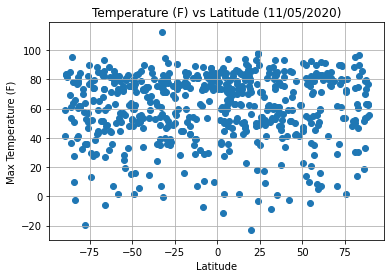

In [29]:
# Create individual scatter plots for temperature, humidty, cloudiness, and wind speed against latitude data

# Create scatter plot of temp vs latitude
plt.scatter(weather_clean['Latitude'], weather_clean['Temperature'], marker='o')

plt.title('Temperature (F) vs Latitude (11/05/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig("lat_vs_temp.png")
plt.show()

# The scatter plot below is displaying all the individual cities from the data table, use column names to populate the data for each axis, added labels and title
# The results don't seem to highlight any sort of correlation without further analysis of the data

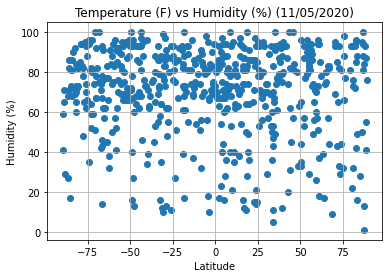

In [30]:
# Create scatter plot of humidity vs latitude

plt.scatter(weather_clean['Latitude'], weather_clean['Humidity'], marker='o')

plt.title('Temperature (F) vs Humidity (%) (11/05/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("lat_vs_humidity.png")
plt.show()

# The scatter plot below is displaying all the individual cities from the data table, use column names to populate the data for each axis, added labels and title
# The results don't seem to highlight any sort of correlation without further analysis of the data

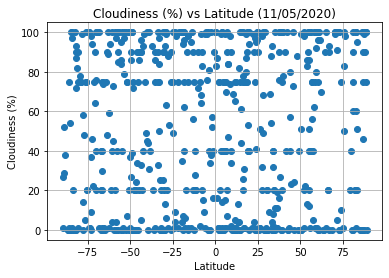

In [31]:
# Create scatter plot of cloudiness vs latitude

plt.scatter(weather_clean['Latitude'], weather_clean['Cloudiness'], marker='o')

plt.title('Cloudiness (%) vs Latitude (11/05/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_vs_cloudiness.png')
plt.show()

# The scatter plot below is displaying all the individual cities from the data table, use column names to populate the data for each axis, added labels and title
# The results don't seem to highlight any sort of correlation without further analysis of the data

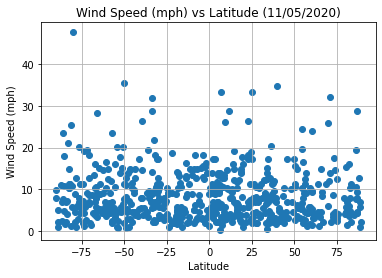

In [32]:
# Create scatter plot of wind speed vs latitude

plt.scatter(weather_clean['Latitude'], weather_clean['Wind Speed'], marker='o')

plt.title('Wind Speed (mph) vs Latitude (11/05/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_vs_wind.png')
plt.show()

# The scatter plot below is displaying all the individual cities from the data table, use column names to populate the data for each axis, added labels and title
# The results don't seem to highlight any sort of correlation without further analysis of the data, there are possibly some outliers in this data which might skew the results

In [33]:
# Run a linear regression for each of the above conditions
# Create Data Tables for northern and southern hemispheres 
northern_hemi = weather_clean.loc[(weather_clean['Latitude'] >=0)]
northern_hemi.dtypes

City            object
Country         object
Latitude       float64
Longitude      float64
Temperature    float64
Humidity          int8
Cloudiness        int8
Wind Speed     float64
Date            object
dtype: object

In [34]:
# northern_hemi['Latitude'] = pd.to_numeric(northern_hemi['Latitude'], downcast="integer")

In [35]:
southern_hemi = weather_clean.loc[(weather_clean['Latitude'] <0)]
southern_hemi.dtypes


City            object
Country         object
Latitude       float64
Longitude      float64
Temperature    float64
Humidity          int8
Cloudiness        int8
Wind Speed     float64
Date            object
dtype: object

The r-squared is: 0.00036225780702865034
P-value: 0.7473094268997307
y = -0.02x + 62.06
The r-squared is: 0.008184814247087776
P-value: 0.12623794653766154
y = 0.08x + 64.17


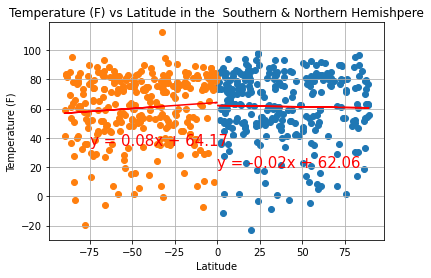

The correlation between both factors is 0.09


In [42]:
# Define Data
x_values = northern_hemi['Latitude']
y_values = northern_hemi['Temperature']

# Create Scatter plot
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
# plt.title('Temperature (F) vs Latitude in the Northern Hemishpere')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid(True)
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')

print(line_eq)


# Define Data
x_values = southern_hemi['Latitude']
y_values = southern_hemi['Temperature']

# Create Scatter plot
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.title('Temperature (F) vs Latitude in the  Southern & Northern Hemishpere')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid(True)
plt.annotate(line_eq,(-75,35),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')

correlation = st.pearsonr(x_values, y_values)

plt.savefig('Homework_Output/temp_north_south.png')

print(line_eq)

plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")


When breaking the set of data into Hemispheres North and South it does little to change the plots after seperting the data points. With r-squared values close to zero in both plots, its hard to draw any solid conclusions from the data aside from a lack of correlation. Looking at the datapoints you can see that all latitudes have about the same range of temperatures regardless of latitude, which is surprising. 

The r-squared is: 2.232717243018793e-10
P-value: 0.9997982007425226
y = 0.0x + 68.64
The r-squared is: 8.603092205441992e-05
P-value: 0.875677608061541
y = 0.01x + 72.23


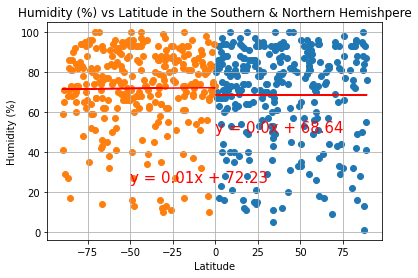

The correlation between both factors is 0.01


In [47]:
# Define Data
x_values = northern_hemi['Latitude']
y_values = northern_hemi['Humidity']

# Create Scatter plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# plt.title('Humidity (%) vs Latitude in the Northern Hemishpere')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')

# plt.savefig('Homework_Output/humid_north.png')

print(line_eq)
# plt.show()

# Define Data
x_values = southern_hemi['Latitude']
y_values = southern_hemi['Humidity']

# Create Scatter plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Humidity (%) vs Latitude in the Southern & Northern Hemishpere')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')


plt.savefig('Homework_Output/humid_north_south.png')
print(line_eq)
plt.show()


correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

When breaking the set of data into Hemispheres North and South it does little to change the plots after seperting the data points. With r-squared values close to zero in both plots, its hard to draw any solid conclusions from the data aside from a lack of correlation. Looking at the datapoints you can see that all latitudes have about the same range of humidty values  regardless of latitude.

The r-squared is: 0.014501117139993457
P-value: 0.04078314789956568
y = 0.19x + 40.49
The r-squared is: 0.002354591306794994
P-value: 0.4128172821068965
y = 0.07x + 54.71


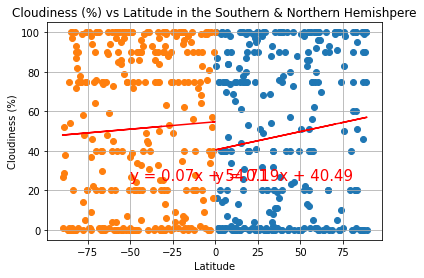

The correlation between both factors is 0.05


In [48]:
# Define Data
x_values = northern_hemi['Latitude']
y_values = northern_hemi['Cloudiness']
plt.grid(True)
# Create Scatter plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
# plt.title('Cloudiness (%) vs Latitude in the Northern Hemishpere')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')

# plt.savefig('Homework_Output/cloud_north.png')

print(line_eq)
# plt.show()

# Define Data
x_values = southern_hemi['Latitude']
y_values = southern_hemi['Cloudiness']

# Create Scatter plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Cloudiness (%) vs Latitude in the Southern & Northern Hemishpere')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
plt.savefig('Homework_Output/cloud_north_south.png')
print(line_eq)
plt.show()


correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


When breaking the set of data into Hemispheres North and South it does little to change the plots after seperting the data points. With r-squared values close to zero in both plots, its hard to draw any solid conclusions from the data aside from a lack of correlation. Looking at the datapoints you can see that all latitudes have about the same range of cloudiness values  regardless of latitude.

The r-squared is: 0.0033060311583407095
P-value: 0.3300379362178474
y = -0.01x + 8.92
The r-squared is: 0.0015405745237861291
P-value: 0.507783380071167
y = -0.01x + 8.23


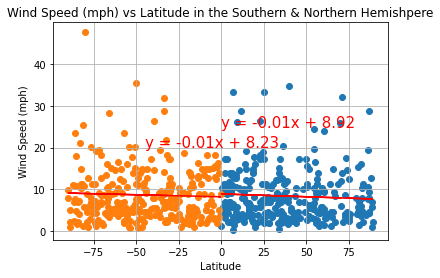

The correlation between both factors is -0.04


In [49]:
# Define Data
x_values = northern_hemi['Latitude']
y_values = northern_hemi['Wind Speed']
plt.grid(True)
# Create Scatter plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
# plt.title('Wind Speed (mph) vs Latitude in the Northern Hemishpere')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')


# plt.savefig('Homework_Output/wind_north.png')
print(line_eq)
# plt.show()

# Define Data
x_values = southern_hemi['Latitude']
y_values = southern_hemi['Wind Speed']

# Create Scatter plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Wind Speed (mph) vs Latitude in the Southern & Northern Hemishpere')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')



plt.savefig('Homework_Output/humid_north_south.png')
print(line_eq)
plt.show()


correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

When breaking the set of data into Hemispheres North and South it does little to change the plots after seperting the data points. With r-squared values close to zero in both plots, its hard to draw any solid conclusions from the data aside from a lack of correlation. Looking at the datapoints you can see that all latitudes have about the same range of wind speed values  regardless of latitude. 